In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
from runner import Runner

In [4]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmp04sx4mu5GP2
Verbose mode active!


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.float32(np.load('/raid/mpsych/OMAMA/GP2/GP2TOYEXAMPLE_LARGE/images.npy'))
masks = np.load('/raid/mpsych/OMAMA/GP2/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
masks.shape

(10000, 512, 512, 1)

In [7]:
masks.dtype

dtype('bool')

In [8]:
images.dtype

dtype('float32')

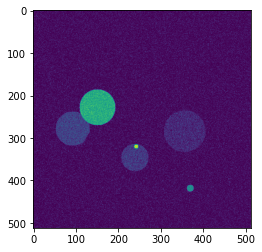

In [9]:
imshow(images[99])

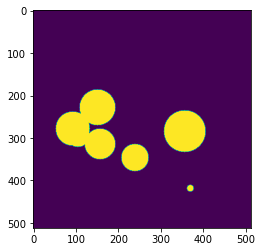

In [10]:
imshow(masks[99])

In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [12]:
#
#
R.setup_data(images, masks, dataset_size=10000, weights=weights)

Weights OK!


In [13]:
RUNS = 10

In [14]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
8/8 [==============================] - 35s 3s/step - loss: 1.3059 - dice_coeff: 0.2631 - val_loss: 1.7578 - val_dice_coeff: 0.2244
Epoch 2/100
8/8 [==============================] - 11s 1s/step - loss: 1.0910 - dice_coeff: 0.3364 - val_loss: 1.6874 - val_dice_coeff: 0.2312
Epoch 3/100
8/8 [==============================] - 12s 2s/step - loss: 0.9997 - dice_coeff: 0.3698 - val_loss: 1.6518 - val_dice_coeff: 0.2376
Epoch 4/100
8/8 [==============================] - 11s 2s/step - loss: 0.9324 - dice_coeff: 0.3974 - val_loss: 1.6240 - val_dice_coeff: 0.2432
Epoch 5/100
8/8 [==============================] - 11s 1s/step - loss: 0.8888 - dice_coeff: 0.4150 - val_loss: 1.6049 - val_dice_coeff: 0.2480
Epoch 6/100
8/8 [==============================] - 12s 2s/step - loss: 0.8491 - dice_coeff: 0.4333 - val_loss: 1.6184 - val_dice_coeff: 0.2503
Epoch 7/100
8/8 [==============================] - 11s 2s/step - loss: 0.8185 - dice_coeff: 0.4467 - val_loss: 1.5892 - val_dice_co

Epoch 58/100
8/8 [==============================] - 12s 2s/step - loss: 0.5100 - dice_coeff: 0.6186 - val_loss: 0.5347 - val_dice_coeff: 0.6012
Epoch 59/100
8/8 [==============================] - 11s 2s/step - loss: 0.5083 - dice_coeff: 0.6200 - val_loss: 0.5288 - val_dice_coeff: 0.6065
Epoch 60/100
8/8 [==============================] - 12s 2s/step - loss: 0.5038 - dice_coeff: 0.6227 - val_loss: 0.5288 - val_dice_coeff: 0.6054
Epoch 61/100
8/8 [==============================] - 11s 1s/step - loss: 0.4999 - dice_coeff: 0.6252 - val_loss: 0.5291 - val_dice_coeff: 0.6049
Epoch 62/100
8/8 [==============================] - 11s 2s/step - loss: 0.5008 - dice_coeff: 0.6250 - val_loss: 0.5208 - val_dice_coeff: 0.6108
Epoch 63/100
8/8 [==============================] - 12s 2s/step - loss: 0.4936 - dice_coeff: 0.6292 - val_loss: 0.5234 - val_dice_coeff: 0.6090
Epoch 64/100
8/8 [==============================] - 12s 2s/step - loss: 0.4909 - dice_coeff: 0.6308 - val_loss: 0.5154 - val_dice_coeff:

Replacing 90 from 271 !
D_relabeled_ 90
selected_ids ['7005c143-77d9-4d78-8361-6dab12f727de', '55f98beb-6d93-491b-af7d-5fb286e429b1', 'd01d6177-2654-4b22-876b-bf530b133187', '2f39fff1-d334-445c-b9ef-6516470c2dff', 'a30111bb-50a0-40b4-85e9-ad4825ebd0aa', '3d61118a-422c-40bb-bb2e-8b66d0506c5d', 'c2f8a250-3649-4e02-a028-4dc2df691a95', '4d50de62-f175-4e92-91e6-9b583cf73c88', '60e75f0e-4c8f-4959-a704-b8a6dbb6d4d0', '85f40fbf-c0d7-4187-8b7e-24e8591af5dd', 'bec52221-db60-495f-a8dc-8b92362fc846', '20068d57-f1d3-4e10-b53d-358d02caf467', 'adcc4548-49e9-4079-b232-7c0c3e8d3e0a', '9c56fea6-4f0d-475d-a48e-9d3ce0d8ee11', '887b2e0f-5fae-49fb-a93f-1c6fa62c2920', '4a2215de-9ce9-486f-b588-80b4fb2f8604', 'a7a0e2d6-ce1e-49f3-9880-ff82687f8e53', 'f36c5548-f541-4ff3-8bf0-55d67ea0fc0e', '3b242c62-cbd8-4da7-af9b-71d07a60c3c4', '11c2ec7b-9f80-4fc1-915a-49b0a3faf63e', 'd0723db8-05c0-4300-8064-251239352ff6', '37e737b9-27b5-4a02-ba8e-ef6ff3b440af', '8387e6a0-6c9b-4259-a4b7-684b6882be53', 'efbe6bdd-4d2f-4c6b-be4d-6

Epoch 7/100
10/10 [==============================] - 13s 1s/step - loss: 0.3814 - dice_coeff: 0.7048 - val_loss: 0.4133 - val_dice_coeff: 0.6847
Epoch 8/100
10/10 [==============================] - 13s 1s/step - loss: 0.3784 - dice_coeff: 0.7088 - val_loss: 0.4076 - val_dice_coeff: 0.6894
Epoch 9/100
10/10 [==============================] - 13s 1s/step - loss: 0.3755 - dice_coeff: 0.7076 - val_loss: 0.4125 - val_dice_coeff: 0.6886
Epoch 10/100
10/10 [==============================] - 13s 1s/step - loss: 0.3729 - dice_coeff: 0.7086 - val_loss: 0.4128 - val_dice_coeff: 0.6851
Epoch 11/100
10/10 [==============================] - 13s 1s/step - loss: 0.3691 - dice_coeff: 0.7151 - val_loss: 0.4031 - val_dice_coeff: 0.6923
Epoch 12/100
10/10 [==============================] - 13s 1s/step - loss: 0.3667 - dice_coeff: 0.7150 - val_loss: 0.4009 - val_dice_coeff: 0.6934
Epoch 13/100
10/10 [==============================] - 13s 1s/step - loss: 0.3645 - dice_coeff: 0.7181 - val_loss: 0.3979 - val_

10/10 [==============================] - 13s 1s/step - loss: 0.2381 - dice_coeff: 0.8110 - val_loss: 0.2862 - val_dice_coeff: 0.7805
Epoch 64/100
10/10 [==============================] - 13s 1s/step - loss: 0.2358 - dice_coeff: 0.8111 - val_loss: 0.2923 - val_dice_coeff: 0.7762
Epoch 65/100
10/10 [==============================] - 13s 1s/step - loss: 0.2339 - dice_coeff: 0.8125 - val_loss: 0.2743 - val_dice_coeff: 0.7891
Epoch 66/100
10/10 [==============================] - 13s 1s/step - loss: 0.2312 - dice_coeff: 0.8148 - val_loss: 0.2774 - val_dice_coeff: 0.7865
Epoch 67/100
10/10 [==============================] - 13s 1s/step - loss: 0.2287 - dice_coeff: 0.8174 - val_loss: 0.2740 - val_dice_coeff: 0.7895
Epoch 68/100
10/10 [==============================] - 13s 1s/step - loss: 0.2271 - dice_coeff: 0.8167 - val_loss: 0.2765 - val_dice_coeff: 0.7875
Epoch 69/100
10/10 [==============================] - 13s 1s/step - loss: 0.2243 - dice_coeff: 0.8199 - val_loss: 0.2798 - val_dice_coeff

Replacing 61 from 185 !
D_relabeled_ 61
selected_ids ['8a36ba30-aef1-4291-b85b-711572d5523b', 'f677fb1f-05e1-460d-8de8-2cac807851bf', '14ef2ace-2ad7-4c4a-990a-c65b1261bb95', '5df9c30e-e187-4f82-baaf-e4b6d1f8e8ca', 'e160aa2c-b621-4f4a-bc09-9092204268c6', '1959bbf9-1244-470a-afc3-bf52a46d6be4', '0ce0f657-a12c-4b73-9ca1-0ec0011a2636', '4c9f96d5-54f2-4ebc-bb7b-9222f2307811', '7c101199-f979-4370-a240-b2a53732589e', 'c81186b5-37c7-474d-8cc1-c25fc817abad', '641d73da-249b-49f8-9400-66e607f339b7', 'bace02bc-a447-4908-bb06-e68611c1caa8', 'bf19fcb2-8b7b-4b68-a6dc-767658141d68', '918f4f87-c0c1-4986-9b4e-8d47b3283766', '0c27673c-8850-4540-add9-e8263c026667', 'e80fad2a-cf92-4f47-9b74-27d70497245c', '74946dd3-5ee6-403f-ba5c-59ced053b55b', '68e64138-ba63-4d57-bc56-babb600d0ef4', '5d435702-6027-45fc-bd58-90c2c30d6209', '1af43092-7072-43f7-b42a-48272425ca68', '1e7e5cb7-4e7d-4032-9e04-19c1090ee48b', 'fb626c7d-cb09-4562-8ad5-91c085a7981f', '99fc52ea-e3ea-4dba-a850-5fe0bd987e78', '1a7af36f-9e68-4549-bc76-c

Epoch 23/100
11/11 [==============================] - 14s 1s/step - loss: 0.1304 - dice_coeff: 0.8960 - val_loss: 0.1728 - val_dice_coeff: 0.8719
Epoch 24/100
11/11 [==============================] - 14s 1s/step - loss: 0.1250 - dice_coeff: 0.8983 - val_loss: 0.1730 - val_dice_coeff: 0.8718
Epoch 25/100
11/11 [==============================] - 13s 1s/step - loss: 0.1236 - dice_coeff: 0.9002 - val_loss: 0.1737 - val_dice_coeff: 0.8716
Epoch 26/100
11/11 [==============================] - 14s 1s/step - loss: 0.1224 - dice_coeff: 0.9011 - val_loss: 0.1731 - val_dice_coeff: 0.8728
Epoch 27/100
11/11 [==============================] - 13s 1s/step - loss: 0.1214 - dice_coeff: 0.9022 - val_loss: 0.1705 - val_dice_coeff: 0.8743
Epoch 28/100
11/11 [==============================] - 14s 1s/step - loss: 0.1200 - dice_coeff: 0.9019 - val_loss: 0.1725 - val_dice_coeff: 0.8729
Epoch 29/100
11/11 [==============================] - 14s 1s/step - loss: 0.1184 - dice_coeff: 0.9026 - val_loss: 0.1748 - v

11/11 [==============================] - 14s 1s/step - loss: 0.0574 - dice_coeff: 0.9537 - val_loss: 0.1188 - val_dice_coeff: 0.9211
Epoch 80/100
11/11 [==============================] - 13s 1s/step - loss: 0.0565 - dice_coeff: 0.9537 - val_loss: 0.1248 - val_dice_coeff: 0.9181
Epoch 81/100
11/11 [==============================] - 14s 1s/step - loss: 0.0559 - dice_coeff: 0.9546 - val_loss: 0.1135 - val_dice_coeff: 0.9247
Epoch 82/100
11/11 [==============================] - 14s 1s/step - loss: 0.0548 - dice_coeff: 0.9548 - val_loss: 0.1180 - val_dice_coeff: 0.9218
Epoch 83/100
11/11 [==============================] - 13s 1s/step - loss: 0.0537 - dice_coeff: 0.9565 - val_loss: 0.1142 - val_dice_coeff: 0.9250
Epoch 84/100
11/11 [==============================] - 14s 1s/step - loss: 0.0539 - dice_coeff: 0.9563 - val_loss: 0.1192 - val_dice_coeff: 0.9219
Epoch 85/100
11/11 [==============================] - 13s 1s/step - loss: 0.0526 - dice_coeff: 0.9578 - val_loss: 0.1116 - val_dice_coeff

Epoch 1/100
11/11 [==============================] - 21s 2s/step - loss: 0.0503 - dice_coeff: 0.9621 - val_loss: 0.1103 - val_dice_coeff: 0.9316
Epoch 2/100
11/11 [==============================] - 14s 1s/step - loss: 0.0432 - dice_coeff: 0.9657 - val_loss: 0.1056 - val_dice_coeff: 0.9342
Epoch 3/100
11/11 [==============================] - 14s 1s/step - loss: 0.0425 - dice_coeff: 0.9664 - val_loss: 0.1020 - val_dice_coeff: 0.9363
Epoch 4/100
11/11 [==============================] - 14s 1s/step - loss: 0.0422 - dice_coeff: 0.9666 - val_loss: 0.1025 - val_dice_coeff: 0.9361
Epoch 5/100
11/11 [==============================] - 14s 1s/step - loss: 0.0412 - dice_coeff: 0.9673 - val_loss: 0.0979 - val_dice_coeff: 0.9387
Epoch 6/100
11/11 [==============================] - 15s 1s/step - loss: 0.0408 - dice_coeff: 0.9677 - val_loss: 0.1008 - val_dice_coeff: 0.9374
Epoch 7/100
11/11 [==============================] - 14s 1s/step - loss: 0.0400 - dice_coeff: 0.9682 - val_loss: 0.0984 - val_dice

11/11 [==============================] - 14s 1s/step - loss: 0.0192 - dice_coeff: 0.9850 - val_loss: 0.0872 - val_dice_coeff: 0.9531
Epoch 58/100
11/11 [==============================] - 14s 1s/step - loss: 0.0191 - dice_coeff: 0.9851 - val_loss: 0.0885 - val_dice_coeff: 0.9526
Epoch 59/100
11/11 [==============================] - 14s 1s/step - loss: 0.0192 - dice_coeff: 0.9851 - val_loss: 0.0864 - val_dice_coeff: 0.9537
Epoch 60/100
11/11 [==============================] - 14s 1s/step - loss: 0.0181 - dice_coeff: 0.9858 - val_loss: 0.0825 - val_dice_coeff: 0.9558
Epoch 61/100
11/11 [==============================] - 14s 1s/step - loss: 0.0183 - dice_coeff: 0.9858 - val_loss: 0.0868 - val_dice_coeff: 0.9540
Epoch 62/100
11/11 [==============================] - 14s 1s/step - loss: 0.0183 - dice_coeff: 0.9858 - val_loss: 0.0865 - val_dice_coeff: 0.9539
Model saved to /tmp/tmp04sx4mu5GP2/unet_3.model
History saved to /tmp/tmp04sx4mu5GP2/history_3.pickle
Testing the classifier...
94/94 [==

Epoch 1/100
12/12 [==============================] - 18s 2s/step - loss: 0.0226 - dice_coeff: 0.9839 - val_loss: 0.0841 - val_dice_coeff: 0.9557
Epoch 2/100
12/12 [==============================] - 15s 1s/step - loss: 0.0207 - dice_coeff: 0.9849 - val_loss: 0.0864 - val_dice_coeff: 0.9545
Epoch 3/100
12/12 [==============================] - 14s 1s/step - loss: 0.0203 - dice_coeff: 0.9850 - val_loss: 0.0791 - val_dice_coeff: 0.9582
Epoch 4/100
12/12 [==============================] - 15s 1s/step - loss: 0.0197 - dice_coeff: 0.9855 - val_loss: 0.0860 - val_dice_coeff: 0.9548
Epoch 5/100
12/12 [==============================] - 15s 1s/step - loss: 0.0190 - dice_coeff: 0.9860 - val_loss: 0.0821 - val_dice_coeff: 0.9569
Epoch 6/100
12/12 [==============================] - 15s 1s/step - loss: 0.0188 - dice_coeff: 0.9861 - val_loss: 0.0849 - val_dice_coeff: 0.9556
Epoch 7/100
12/12 [==============================] - 14s 1s/step - loss: 0.0183 - dice_coeff: 0.9864 - val_loss: 0.0858 - val_dice

Replacing 52 from 156 !
D_relabeled_ 52
selected_ids ['dd5faddf-a63b-4d10-9ff1-bdbe8ce13f6e', '6e79e66e-37a8-4e44-aa6f-df763ac81e28', 'f527609c-b49d-48e0-8919-33164387b13e', 'c008779a-db26-439f-8a8b-ee431f1974c9', '0a28804a-60a4-48a3-bd9b-343ddf07fa46', '3633e11a-5f0b-4c6b-8869-6559319dbf64', '8c8a5587-a8c6-40ba-ab88-676726e254ed', 'd0f4c358-62c0-413c-a2a7-f3a36af66b2b', 'f0248ea0-962c-4a0c-a009-f7c8307ef8c9', '2a389c42-726f-4382-9777-461f79b87764', 'e0ff2a59-8b5c-4623-816e-feef3d426135', '6e76fe6c-a02c-4091-9ea3-f36e47183a98', 'dddc7b4a-73af-4d91-b4a5-82bbf637e157', 'f0690ef7-e792-4c2d-a15b-f9a3f0e8029d', '08241062-611d-4218-8b6b-ceef353621cb', '0fa95ede-8d94-46ff-965e-29293ea4d08b', '6ceef0dd-1992-4bff-9a2a-cd1db24d8bae', '6a8170d9-730a-4083-b098-e232b9b286d3', '75b2e173-0628-45d3-8944-95896169b503', '89c351df-6b68-4afa-aa76-8d1a81ef7158', '6ba1e8fd-65f3-400d-9ca3-3c81e2a057ed', '2d156bbc-c2b3-4925-a5e2-b097ab7540f8', '8c64383d-5f69-434b-ab5e-ffff2d7288ca', 'b9fe2a57-0bf4-4717-801c-4

Epoch 28/100
13/13 [==============================] - 16s 1s/step - loss: 0.0098 - dice_coeff: 0.9935 - val_loss: 0.0796 - val_dice_coeff: 0.9639
Epoch 29/100
13/13 [==============================] - 15s 1s/step - loss: 0.0093 - dice_coeff: 0.9937 - val_loss: 0.0882 - val_dice_coeff: 0.9600
Epoch 30/100
13/13 [==============================] - 16s 1s/step - loss: 0.0093 - dice_coeff: 0.9939 - val_loss: 0.0855 - val_dice_coeff: 0.9617
Epoch 31/100
13/13 [==============================] - 15s 1s/step - loss: 0.0094 - dice_coeff: 0.9936 - val_loss: 0.0828 - val_dice_coeff: 0.9628
Model saved to /tmp/tmp04sx4mu5GP2/unet_5.model
History saved to /tmp/tmp04sx4mu5GP2/history_5.pickle
Testing the classifier...
94/94 [==============================] - 9s 100ms/step - loss: 0.0820 - dice_coeff: 0.9626
Testing the discriminator...
19/19 [==============================] - 1s 41ms/step - loss: 7.7716 - accuracy: 0.7333
Found 141 machine labels.
Machine labels [  0   1   4  12  16  18  20  21  24  2

Epoch 1/100
13/13 [==============================] - 24s 2s/step - loss: 0.0162 - dice_coeff: 0.9908 - val_loss: 0.0796 - val_dice_coeff: 0.9643
Epoch 2/100
13/13 [==============================] - 16s 1s/step - loss: 0.0132 - dice_coeff: 0.9922 - val_loss: 0.0803 - val_dice_coeff: 0.9642
Epoch 3/100
13/13 [==============================] - 16s 1s/step - loss: 0.0125 - dice_coeff: 0.9926 - val_loss: 0.0784 - val_dice_coeff: 0.9651
Epoch 4/100
13/13 [==============================] - 16s 1s/step - loss: 0.0121 - dice_coeff: 0.9928 - val_loss: 0.0820 - val_dice_coeff: 0.9636
Epoch 5/100
13/13 [==============================] - 16s 1s/step - loss: 0.0117 - dice_coeff: 0.9929 - val_loss: 0.0765 - val_dice_coeff: 0.9658
Epoch 6/100
13/13 [==============================] - 16s 1s/step - loss: 0.0112 - dice_coeff: 0.9932 - val_loss: 0.0824 - val_dice_coeff: 0.9635
Epoch 7/100
13/13 [==============================] - 16s 1s/step - loss: 0.0229 - dice_coeff: 0.9880 - val_loss: 0.0774 - val_dice

Epoch 1/100
14/14 [==============================] - 22s 2s/step - loss: 0.0148 - dice_coeff: 0.9917 - val_loss: 0.0776 - val_dice_coeff: 0.9659
Epoch 2/100
14/14 [==============================] - 16s 1s/step - loss: 0.0130 - dice_coeff: 0.9926 - val_loss: 0.0788 - val_dice_coeff: 0.9653
Epoch 3/100
14/14 [==============================] - 16s 1s/step - loss: 0.0120 - dice_coeff: 0.9928 - val_loss: 0.0808 - val_dice_coeff: 0.9646
Epoch 4/100
14/14 [==============================] - 16s 1s/step - loss: 0.0118 - dice_coeff: 0.9930 - val_loss: 0.0819 - val_dice_coeff: 0.9641
Epoch 5/100
14/14 [==============================] - 16s 1s/step - loss: 0.0145 - dice_coeff: 0.9912 - val_loss: 0.0744 - val_dice_coeff: 0.9664
Epoch 6/100
14/14 [==============================] - 17s 1s/step - loss: 0.0103 - dice_coeff: 0.9940 - val_loss: 0.0747 - val_dice_coeff: 0.9669
Epoch 7/100
14/14 [==============================] - 17s 1s/step - loss: 0.0098 - dice_coeff: 0.9941 - val_loss: 0.0789 - val_dice

Epoch 1/100
15/15 [==============================] - 18s 1s/step - loss: 0.0156 - dice_coeff: 0.9914 - val_loss: 0.0742 - val_dice_coeff: 0.9675
Epoch 2/100
15/15 [==============================] - 17s 1s/step - loss: 0.0123 - dice_coeff: 0.9927 - val_loss: 0.0773 - val_dice_coeff: 0.9665
Epoch 3/100
15/15 [==============================] - 17s 1s/step - loss: 0.0114 - dice_coeff: 0.9934 - val_loss: 0.0818 - val_dice_coeff: 0.9649
Epoch 4/100
15/15 [==============================] - 17s 1s/step - loss: 0.0111 - dice_coeff: 0.9934 - val_loss: 0.0827 - val_dice_coeff: 0.9646
Epoch 5/100
15/15 [==============================] - 17s 1s/step - loss: 0.0106 - dice_coeff: 0.9936 - val_loss: 0.0867 - val_dice_coeff: 0.9629
Epoch 6/100
15/15 [==============================] - 17s 1s/step - loss: 0.0104 - dice_coeff: 0.9938 - val_loss: 0.0846 - val_dice_coeff: 0.9637
Epoch 7/100
15/15 [==============================] - 17s 1s/step - loss: 0.0100 - dice_coeff: 0.9939 - val_loss: 0.0830 - val_dice

Replacing 49 from 149 !
D_relabeled_ 49
selected_ids ['af2a55c9-a62f-4e92-a46b-464bbf5ca405', 'ba62c36f-0277-47e8-a06f-e7875b364fb8', 'c241b6eb-8746-4cb0-8e43-a36ed1fdb36a', 'a7636747-1e04-49da-b824-adee9d1ea116', '0e55df32-5ccd-4f63-9cb0-d09857337b30', 'e4cd7281-b053-4972-8d42-41a4473e6520', '86e0d062-c7e9-4108-968d-30e00140138c', '068807f2-1a9b-4060-9474-2f3b6eaf0c6f', '00f02044-34dd-4904-b569-7955f12b278d', 'ce7817df-ea34-4e10-9b18-d858b98c7202', '2fc3a91e-c21f-45c2-9a17-23d154cbcfd1', '2a6313eb-f38a-4fc7-9675-7e19a793e796', '88caf576-d059-4c49-8a4c-6df2d4f648e8', 'ae914339-0661-4ffa-9c76-6746f40e46cb', 'd9b022c9-f8c4-4c11-b609-9adc7430dd62', '4811bd27-d244-40e3-81cb-b96cac080862', '49a6274e-4788-44c9-bc65-a4c031850495', 'a7b2edd2-cd46-4d86-9ad1-7ac5d732388d', '40d6b63c-1b8d-448c-9c55-561965216f31', 'b70879e1-03ce-4e06-851b-89ec70cfebf5', '646af744-e187-4eee-a6cc-cedccf5900fb', '205a73c9-a9ea-469b-b85a-a92f364bb7f8', '6ec39859-708f-4c49-b6c8-468dfaa9faaf', 'cfee8eec-024b-4782-aab9-9

D_relabeled_ 36
selected_ids ['92df712f-7228-4ad0-828e-0d89dd1830c9', 'a6acbe58-570c-45cf-980a-bdc3a7270ef4', '7982a451-64cf-4e00-bc65-97612a9afc5c', 'c7f02e3e-3054-4ebd-82a7-797e1ab6d889', '23375fd7-65ac-40e0-be34-fbd1ade1e0cc', '71020bb7-41f2-4cbe-b03a-87572fd57281', 'd95111e6-5bab-4610-b575-79b729390ea7', 'cef71af0-8873-49fb-b25d-d0768e3880fa', '5c467be5-866e-4835-9af4-d619d623aa09', '258186c0-43b7-4faf-bc0c-c2a7f0b13766', '915bcefc-ebd6-45b1-8fa8-a867cf0d6fa0', 'eda5766d-e189-4331-a53b-9a2483dd916a', '712aeeb9-2693-4865-a993-0602e6ff4a22', '5ebe8f4f-1f73-493d-8e05-70be6d46da51', 'a554450f-1049-4f7a-b6af-cb89b4b135e5', 'c1a17107-4e93-4f86-9047-49a8fc8f4e59', 'aef9b236-b4f1-47d4-aced-62ed42cdb8c7', '85fc3d6e-6184-49bf-a096-bbf3dae9532d', 'a0c1a60c-f71e-4e11-9b62-9c44b0053919', '61130d81-1de2-41e8-9a5a-bda77a173afc', '1eff85ed-861b-4751-8882-df76f450c5c9', '136cb06f-f153-48dc-b4f5-f94d88f2c971', '838d4b03-5730-4dd5-afc5-69e8bb6e12be', '9922a5ec-af42-4f3d-a046-291efe78f836', '1faac90a-

In [15]:
R.classifier_scores

[[0.4297398328781128, 0.6728993058204651],
 [0.21631765365600586, 0.8355512619018555],
 [0.11644833534955978, 0.9287734627723694],
 [0.08617112040519714, 0.9535852074623108],
 [0.0848190039396286, 0.9586471915245056],
 [0.08201313763856888, 0.9626365303993225],
 [0.07788203656673431, 0.9650528430938721],
 [0.08557958155870438, 0.9623087644577026],
 [0.08251579105854034, 0.9644892811775208],
 [0.08258938044309616, 0.9658980965614319]]

In [16]:
R.discriminator_scores

[[0.7529200911521912, 0.9616666436195374],
 [4.864213943481445, 0.7983333468437195],
 [13.943528175354004, 0.6166666746139526],
 [6.851806640625, 0.721666693687439],
 [6.403871059417725, 0.7583333253860474],
 [7.771566390991211, 0.7333333492279053],
 [9.682947158813477, 0.6850000023841858],
 [9.234519004821777, 0.6966666579246521],
 [7.21781587600708, 0.7766666412353516],
 [9.358545303344727, 0.7083333134651184]]

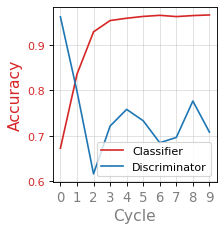

In [17]:
R.plot()

In [15]:
R.classifier_scores

[[0.39096784591674805, 0.7002140879631042],
 [0.17653889954090118, 0.8683884739875793],
 [0.09145656228065491, 0.9439679980278015],
 [0.08438147604465485, 0.9517934322357178],
 [0.07903798669576645, 0.9583305716514587]]

In [16]:
R.discriminator_scores

[[0.1529879868030548, 0.9783333539962769],
 [0.6448941230773926, 0.9116666913032532],
 [2.4462530612945557, 0.800000011920929],
 [3.24053955078125, 0.7516666650772095],
 [2.4497368335723877, 0.8166666626930237]]

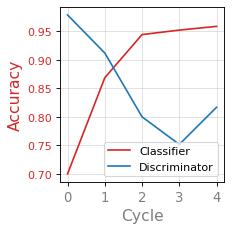

In [17]:
R.plot()